In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_csv('housing.csv')

In [50]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [52]:
data.dropna(inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [54]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [55]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2)
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

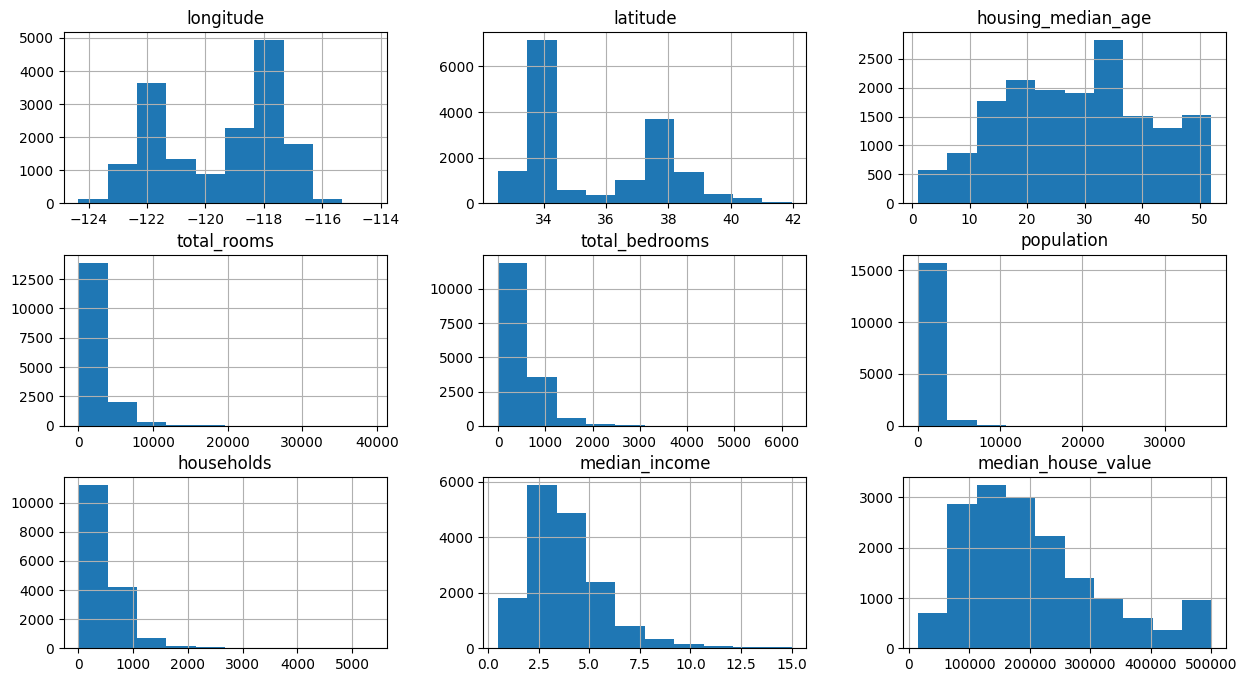

In [56]:
train_data.hist(figsize=(15,8))

In [57]:
numeric_data = train_data.select_dtypes(include=['float64','int64'])
corr_matrix = numeric_data.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924425           -0.105089     0.048675   
latitude            -0.924425  1.000000            0.010475    -0.036719   
housing_median_age  -0.105089  0.010475            1.000000    -0.363580   
total_rooms          0.048675 -0.036719           -0.363580     1.000000   
total_bedrooms       0.071760 -0.066490           -0.322407     0.930423   
population           0.103316 -0.110469           -0.295609     0.852252   
households           0.058352 -0.072087           -0.303868     0.917235   
median_income       -0.015227 -0.079405           -0.120705     0.202283   
median_house_value  -0.039968 -0.148783            0.097248     0.136374   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071760    0.103316    0.058352      -0.015227   
latitude                 -0.066490   -0.110469   -0.072087      -0.079405   
housing_

<Axes: >

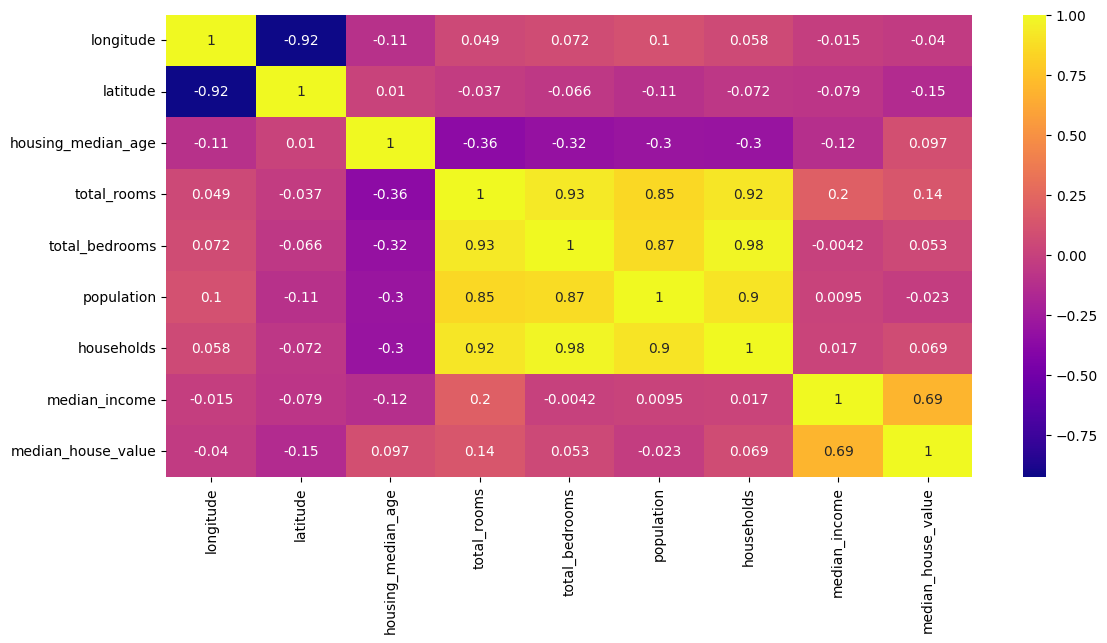

In [58]:
plt.figure(figsize=(13,6))
sns.heatmap(corr_matrix, annot=True, cmap="plasma")

In [59]:
#preprocesing
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)  #+1 to prevent zero values
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

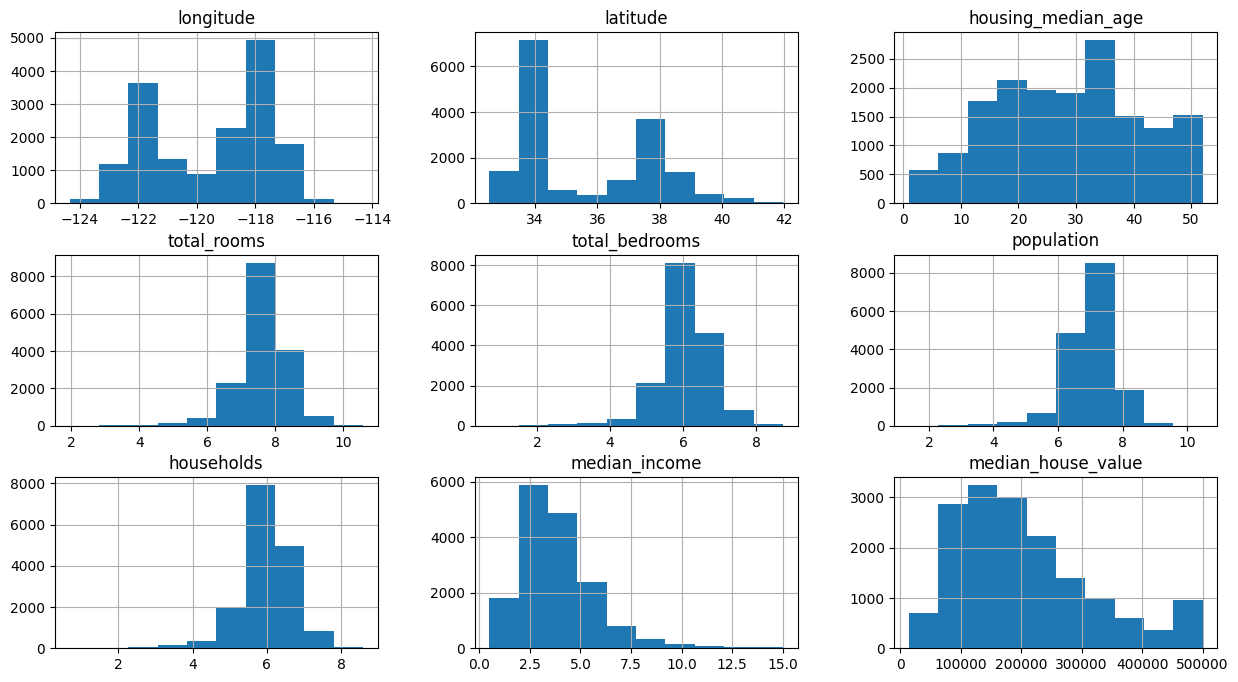

In [60]:
train_data.hist(figsize=(15,8))

In [61]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)

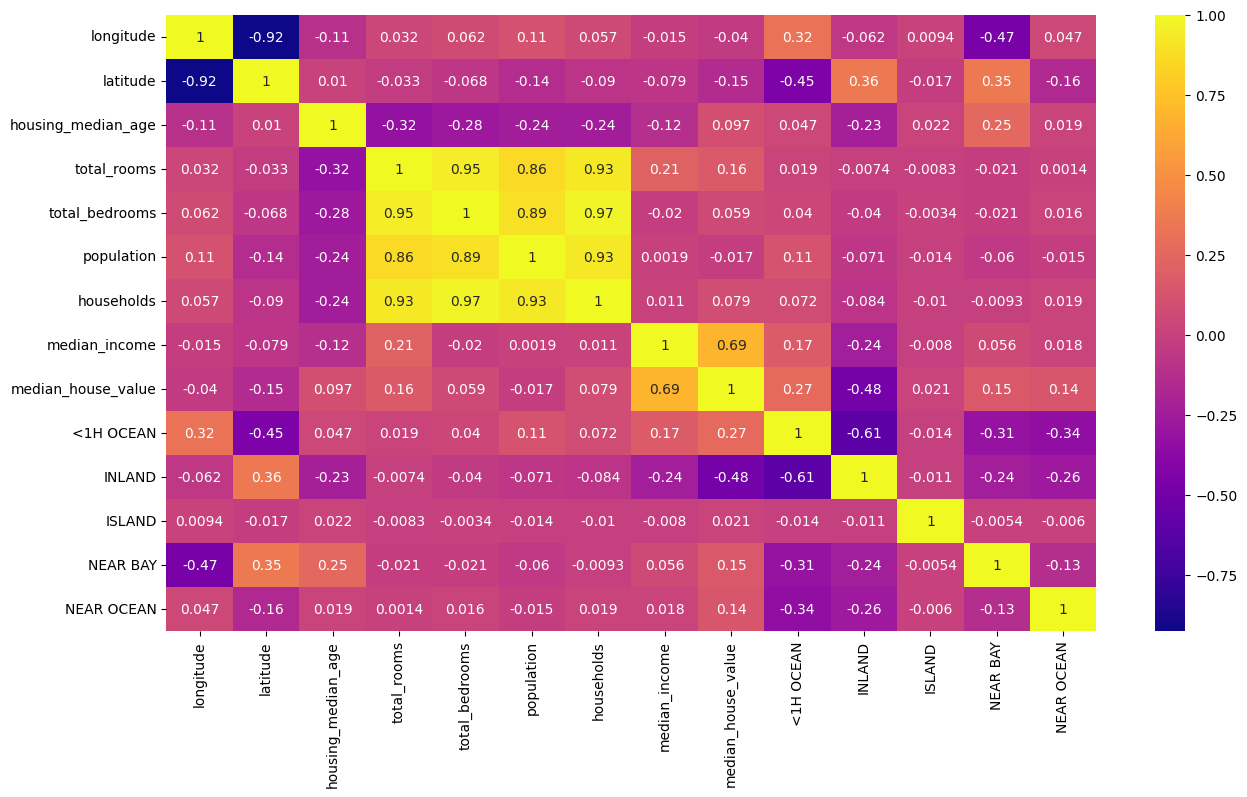

In [62]:
corr_matrix = train_data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap="plasma")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

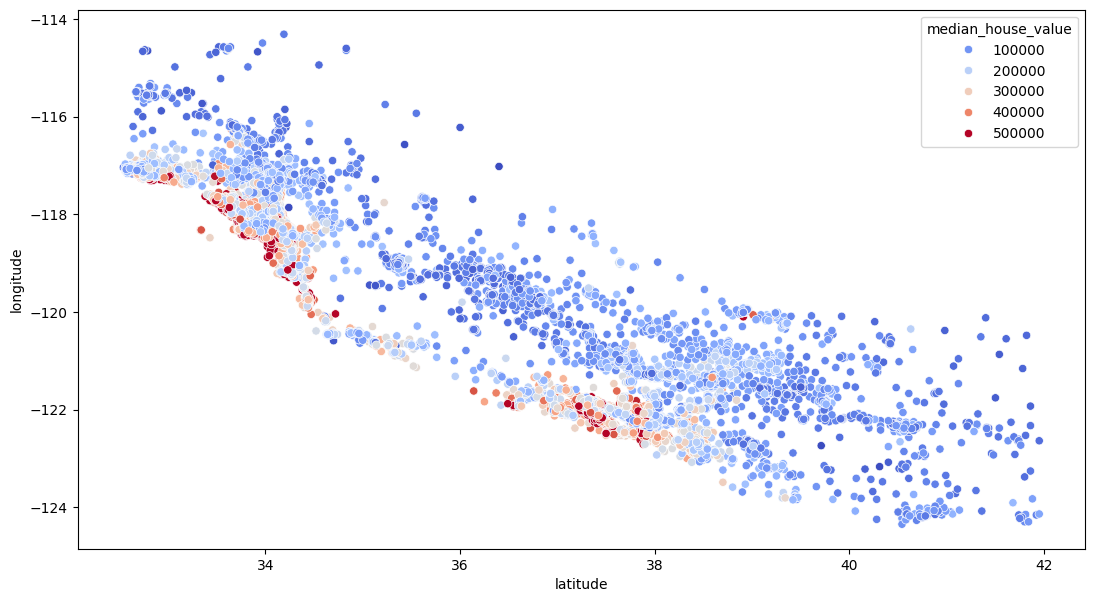

In [63]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [64]:
train_data['bedroom ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms']/train_data['households']

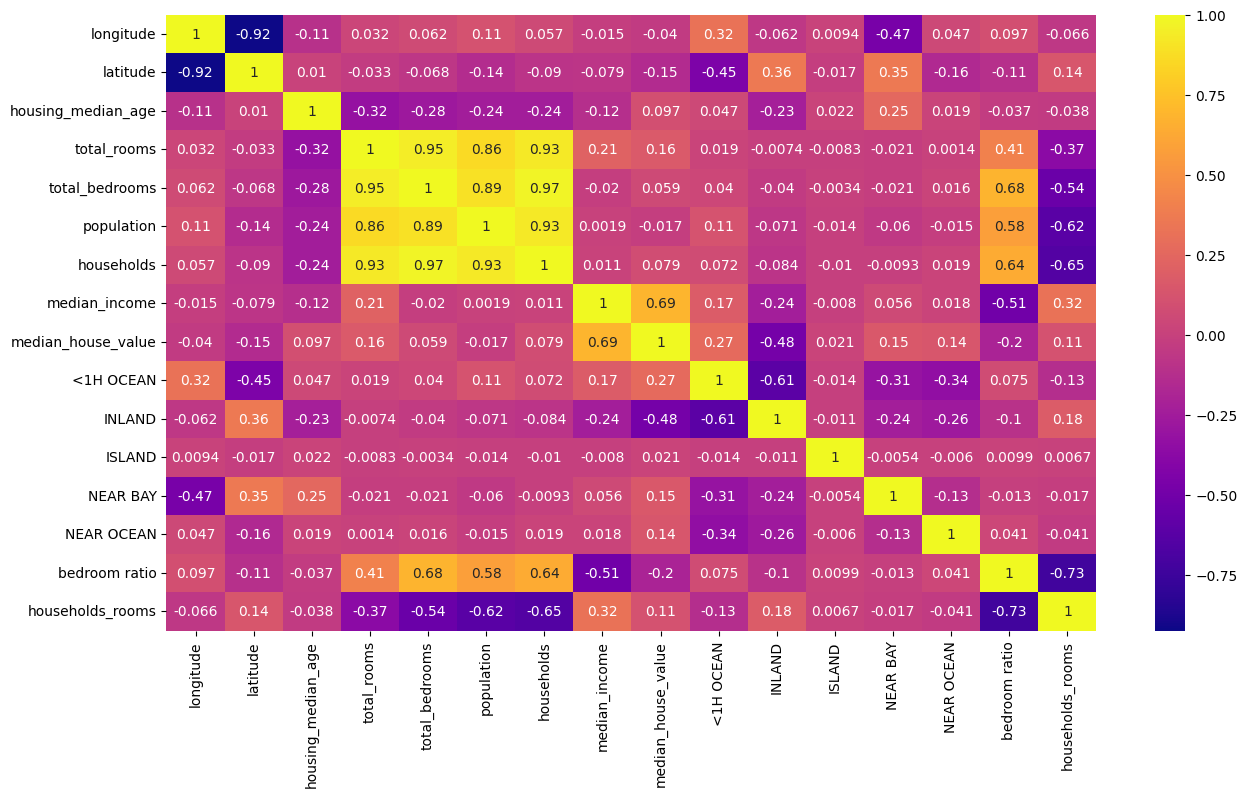

In [65]:
corr_matrix = train_data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap="plasma")
plt.show()

In [66]:
#preparing data and training the linear regresssion model
from sklearn.linear_model import LinearRegression
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [67]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)  #+1 to prevent zero values
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms']/test_data['households']


In [68]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [69]:
reg.score(x_test, y_test)

0.6710382769812867

In [70]:
#RandomForestRegressor model,more accurate compared to LinearRegression
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [71]:
forest.score(x_test, y_test)

0.8173603653589034

In [72]:
#Grid Search Cross Validation model
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

parameter_grid = {
    'n_estimators': [30, 50, 100],
    'min_samples_split': [2,4,6,8],
    'max_features': [8,12,20]
}

grid_search = GridSearchCV(forest, parameter_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [73]:
best_forest = grid_search.best_estimator_

In [74]:
best_forest.score(x_test, y_test)

0.8208217344978603

In [76]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
random_search = RandomizedSearchCV(estimator, param_dist, cv=5, scoring='neg_mean_squared_error', n_iter=10)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score

NameError: name 'estimator' is not defined

In [75]:
# Saving models

# Import joblib for saving models
import joblib

# 1. Save the Linear Regression model
lr_model_filename = "linear_regression_model.pkl"
joblib.dump(reg, lr_model_filename)
print(f"Linear Regression model saved to {lr_model_filename}")

# 2. Save the basic Random Forest model
rf_model_filename = "random_forest_model.pkl"
joblib.dump(forest, rf_model_filename)
print(f"Random Forest model saved to {rf_model_filename}")

# 3. Save the Grid Search optimized Random Forest model
best_rf_model_filename = "best_random_forest_model.pkl"
joblib.dump(best_forest, best_rf_model_filename)
print(f"Grid Search optimized Random Forest model saved to {best_rf_model_filename}")

Save all models in a dictionary
all_models = {
    'linear_regression': reg,
    'random_forest': forest,
    'best_random_forest': best_forest
}
all_models_filename = "all_housing_models.pkl"
joblib.dump(all_models, all_models_filename)
print(f"All models saved together in {all_models_filename}")

Linear Regression model saved to linear_regression_model.pkl
Random Forest model saved to random_forest_model.pkl
Grid Search optimized Random Forest model saved to best_random_forest_model.pkl
All models saved together in all_housing_models.pkl
